In [24]:
import numpy as np



# **Задача 2**

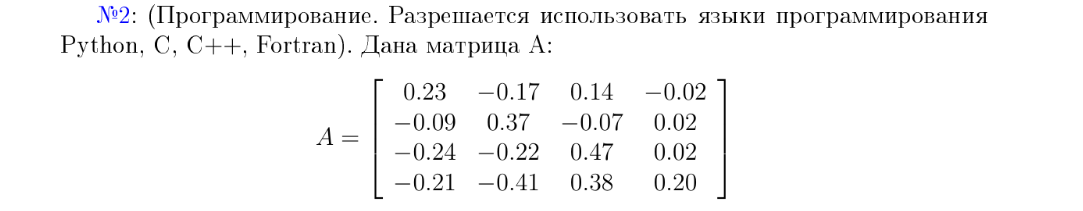

In [25]:
A = np.array([[0.23, -0.17, 0.14, -0.02],
     [-0.09, 0.37, -0.07, 0.02],
     [-0.24, -0.22, 0.47, 0.02],
     [-0.21, -0.41, 0.38, 0.20]])


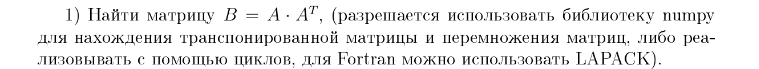

In [26]:
A_tr = np.transpose(A)
B  = np.matmul(A, A_tr)
print(B)

[[ 0.1018 -0.0938  0.0476  0.0706]
 [-0.0938  0.1503 -0.0923 -0.1554]
 [ 0.0476 -0.0923  0.3273  0.3232]
 [ 0.0706 -0.1554  0.3232  0.3966]]


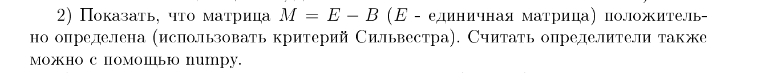

[Критерий Сильвестра](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A1%D0%B8%D0%BB%D1%8C%D0%B2%D0%B5%D1%81%D1%82%D1%80%D0%B0)

In [27]:
sh = np.shape(A)[0]
E = np.eye(sh)
M = np.array(E - B)
print(M)


[[ 0.8982  0.0938 -0.0476 -0.0706]
 [ 0.0938  0.8497  0.0923  0.1554]
 [-0.0476  0.0923  0.6727 -0.3232]
 [-0.0706  0.1554 -0.3232  0.6034]]


In [28]:
def det(m,i):
    a = [row[:i]  for row in (M[:i])]
    return np.linalg.det(a)

In [29]:
def silv(sh, m):
  k = 0
  for i in range(sh-1):
    if det(m, i+1) > 0:
      k = k
    else:
      k += 1
  if k == 0:
    print("критерий сильвестра выполнен, матрица положительно определена")
    return True
  else:
    print("критерий не выполнен")
    return False
silv(sh, M)


критерий сильвестра выполнен, матрица положительно определена


True

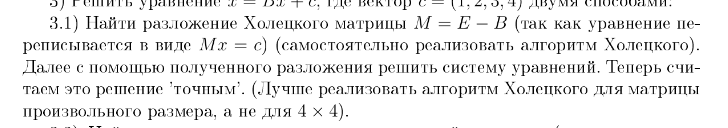

$M x = c$, $M = LL^T$






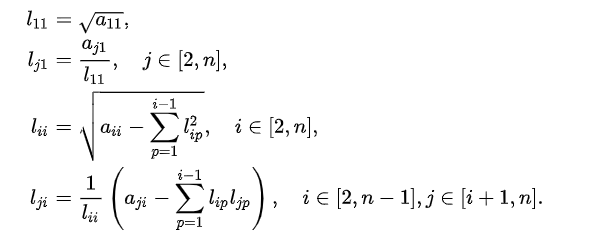

In [30]:
print(M)
M[1, :4]

[[ 0.8982  0.0938 -0.0476 -0.0706]
 [ 0.0938  0.8497  0.0923  0.1554]
 [-0.0476  0.0923  0.6727 -0.3232]
 [-0.0706  0.1554 -0.3232  0.6034]]


array([0.0938, 0.8497, 0.0923, 0.1554])

In [31]:
def L_matrix(m):
  sh_m = np.shape(m)[0]
  L = np.zeros((sh_m, sh_m))
  L[0,0] = np.sqrt(m[0,0])
  for i in range(1, sh_m):
    L[i,0] = m[i, 0] / L[0,0]
  for j in range(1, sh_m ):
    L[j,j] = np.sqrt(m[j,j] - np.sum((L[j, :j])**2))
  for j in range(1, sh_m-1):
    for i in range(j + 1, sh_m):
      L[i, j] = 1/L[j,j] * (m[i,j] - np.sum(np.multiply(L[j, :j] , L[i, :j])))
      print(i, j)
      print( L[i, :j])
      print(L[j, :j])
  for j in range(1, sh_m ):
    L[j,j] = np.sqrt(m[j,j] - np.sum((L[j, :j])**2))
  return L



In [32]:
L = L_matrix(M)

2 1
[-0.05022506]
[0.0989729]
3 1
[-0.07449347]
[0.0989729]
3 2
[-0.07449347  0.17760983]
[-0.05022506  0.10613732]


In [33]:
L_new = np.linalg.cholesky(M)

In [34]:
c = np.array([1, 2, 3, 4])

In [35]:
y = np.linalg.solve(L, c)
y

array([1.05514823, 2.06835299, 3.49063234, 8.32631644])

In [36]:
x_hol = np.linalg.solve(L.T, y)
x_hol

array([ 2.9317585 , -1.63771832, 11.25698309, 13.3690526 ])

In [37]:
y_new =  np.linalg.solve(L_new, c) #это самопроверка
x_new = np.linalg.solve(L_new.T, y_new)
x_new

array([ 2.95404386, -1.6798556 , 11.38892545, 13.50763302])

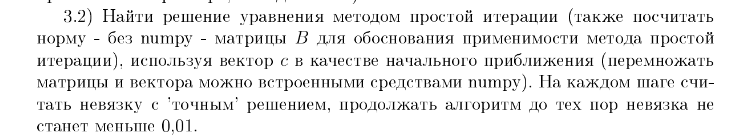

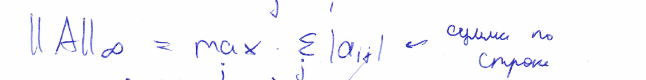

In [38]:
def matrix_norm(m): #возможно я слишком буквально поняла "сделать это без нампай" и написала все через циклы...
  k = 0
  for i in range(np.shape(m)[0]):
    a = 0
    for j in range(np.shape(m)[0]):
      a = a + abs((m[i,j]) )
    if a>k:
      k = a
    else:
      k = k
  if k<1:
    #print("inf норма меньше единицы, метод сходится ")
    return k
  else:
    #print("inf норма не меньше единицы, метод может расходиться ")
    return k



In [39]:
matrix_norm(B)

0.9458

In [40]:
np.linalg.norm(B, np.inf) #проверка

0.9458

In [41]:
x_iter = c
z = 100
x_c = np.linalg.solve(M, c)
while z > 0.01:
  x_iter = np.dot(B, x_iter) + c
  z = np.abs(np.sum(x_iter - x_c))
print(z)
print(x_iter)

0.00905676463430427
[ 2.95279578 -1.6775692  11.38424114 13.50222224]


In [42]:
#сравнение методов Холецкого и простой итерации
nev = x_hol - x_iter
nev

array([-0.02103728,  0.03985087, -0.12725805, -0.13316964])

# **Задача 3**

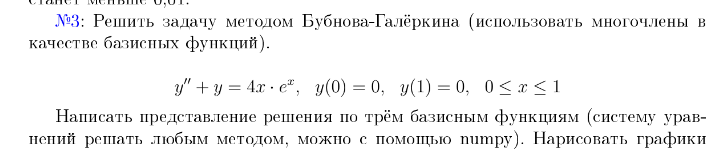

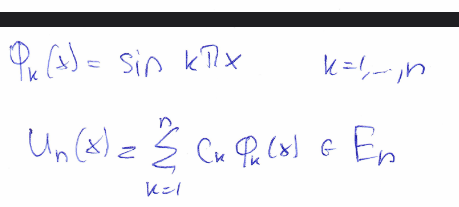

$Lu = f$

$u_n = \sum_{i=1}^{n} c_i \phi_i $ (базисные функции $\phi$ должны соответствовать гран условиям)

Условие ортогональности: $(Lu_n - f, \psi_k) = 0 $

А, значит
$\sum_{i=1}^{n}( L \phi_i, \psi_k,)  c_i = (f,  \phi_i )$

Метод Галеркина:  $\psi_k = \phi_k$

$\sum_{i=1}^{n}( L \phi_i, \phi_k,)  c_i = (f,  \phi_i )$

Коэффициенты c1, c2, c3: [1.28895409 1.23396921 0.52610896]


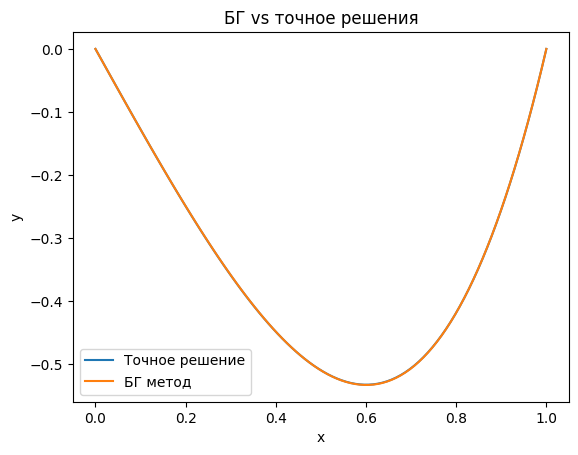

In [105]:
import scipy.integrate as spi


def phi1(x):
    return x*(x-1)

def phi2(x):
    return x**2*(x-1)

def phi3(x):
    return x**3*(x-1)

def integrand(x, phi):
    return 4*x*np.exp(x)*phi(x)

def L(f, x):
    f_pp = (f(x + 0.01) - 2*f(x) + f(x - 0.01))/(0.01**2) #тут h = 0.01
    L = f_pp + f(x)
    return L

def coeffs():
    sc_Lphiphk = np.zeros((3, 3))
    sc_fphi = np.zeros(3)
    for i, phi_i in enumerate([phi1, phi2, phi3]):
        for j, phi_j in enumerate([phi1, phi2, phi3]):
            sc_Lphiphk[i, j] = spi.quad(lambda x: L(phi_i, x)*phi_j(x), 0, 1)[0]
    for i, phi in enumerate([phi1, phi2, phi3]):
        sc_fphi[i] = -spi.quad(lambda x: integrand(x, phi), 0, 1)[0]

    c = -np.linalg.solve(sc_Lphiphk, sc_fphi)
    return c

def y(x, c):
    return c[0]*phi1(x) + c[1]*phi2(x) + c[2]*phi3(x)

def tr_sol(x):
    return 2*(np.exp(x)*(x-1) + np.cos(x) - 0.642093*np.sin(x))


c = coeffs()
print("Коэффициенты c1, c2, c3:", c)

x_values = np.linspace(0, 1, 100)
y_true = tr_sol(x_values)
y_approx = y(x_values, c)

plt.plot(x_values, y_true, label='Точное решение')
plt.plot(x_values, y_approx, label='БГ метод')
plt.xlabel('x')
plt.ylabel('y')
plt.title('БГ vs точное решения')
plt.legend()
plt.show()

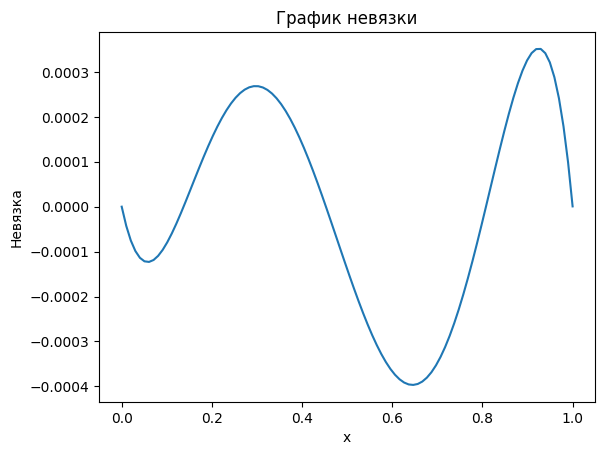

In [106]:
residuals = y(x_values, c) - tr_sol(x_values)

plt.plot(x_values, residuals)
plt.xlabel('x')
plt.ylabel('Невязка')
plt.title('График невязки')
plt.show()

# **Задача 1**

Я сделала доказательство (1ое фото), но с поиском N возникли проблемы - я не смогла дойти до ответа. В решении пользовалась разложениями в ряд Тейлора и в конце пробовала метод Ньютона... Я его не дописала, мне показалось, что, возможно, решение гораздо проще и я зря расписывала все это:) Далее я построила графики (код ниже).


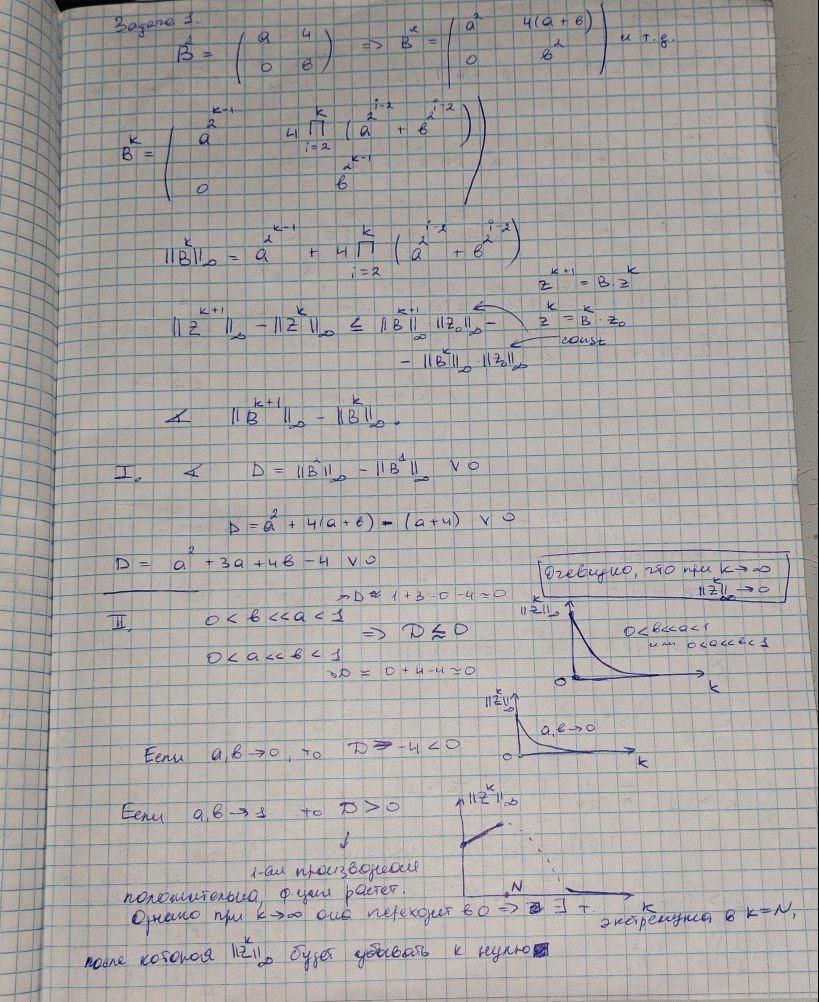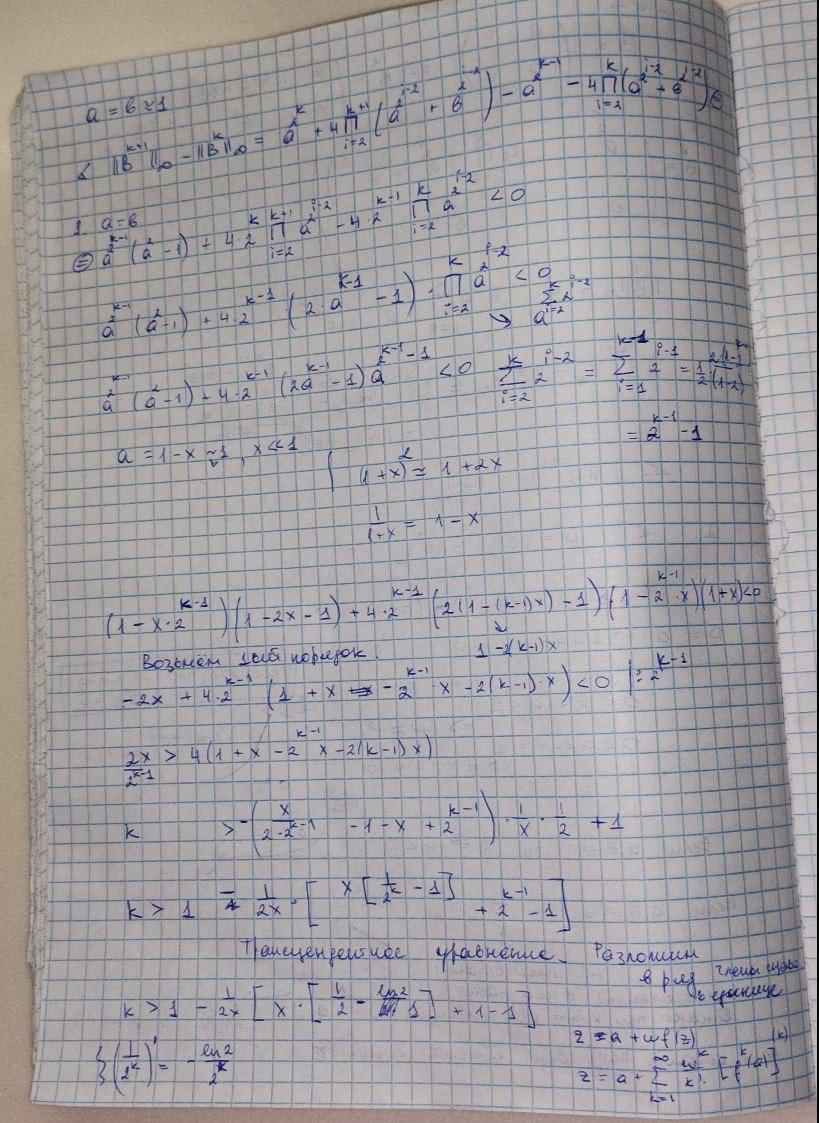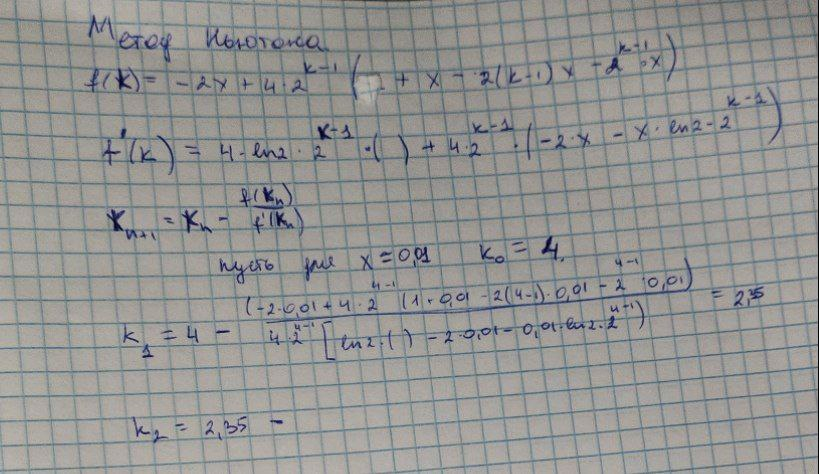


7.912100000000001
11.90692641
14.547686047139493
11.29868429415575
3.4778386508019707
0.16646296172352607
0.00019167041159322441
1.2738812639728534e-10
2.8171634055316815e-23
6.893362245208106e-49
2.0643376150546777e-100
9.258075987270678e-204
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


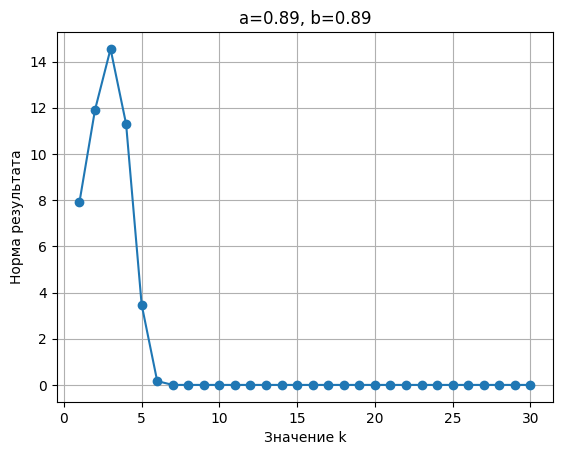

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def matrix_norm_1(m):
    return np.linalg.norm(m, ord=np.inf)


def func1(m, k):
    norms = []
    for i in range(k):
        m = np.dot(m, m)
        norms.append(matrix_norm(m))
        print(matrix_norm(m))
    return norms

a = 0.89

B_m = np.array([[a, 4],
                [0, a]])

k_values = list(range(1, 31))
norms = func1(B_m, 30)

plt.plot(k_values, norms, marker='o', label=f'a={B_m[0,0]}, b={B_m[1,1]}')
plt.title( f'a={B_m[0,0]}, b={B_m[1,1]}')
plt.xlabel('Значение k')
plt.ylabel('Норма результата')
plt.grid(True)
plt.show()